## 3. praktiskais darbs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

X = np.linspace(-5, 5, 500)
Y = np.linspace(-5, 5, 500)
x, y = np.meshgrid(X, Y)

DRAW_POTENTIALS = True


def pseudo_stream_plot(axis, x, y, data, density, arrow_frequency):
    cs = axis.contour(x, y, data, colors="navy", linestyles="solid", locator=ticker.MultipleLocator(density))
    # Uzzīmēs bultiņas, kas parāda plūsmas virzienu
    fmt = {}
    for l in cs.levels:
        fmt[l] = "➤"
    cls = ax.clabel(cs, cs.levels[::arrow_frequency], inline=True, fmt=fmt, rightside_up=False)
    axis.set_aspect("equal")

# Homogēna plūsma

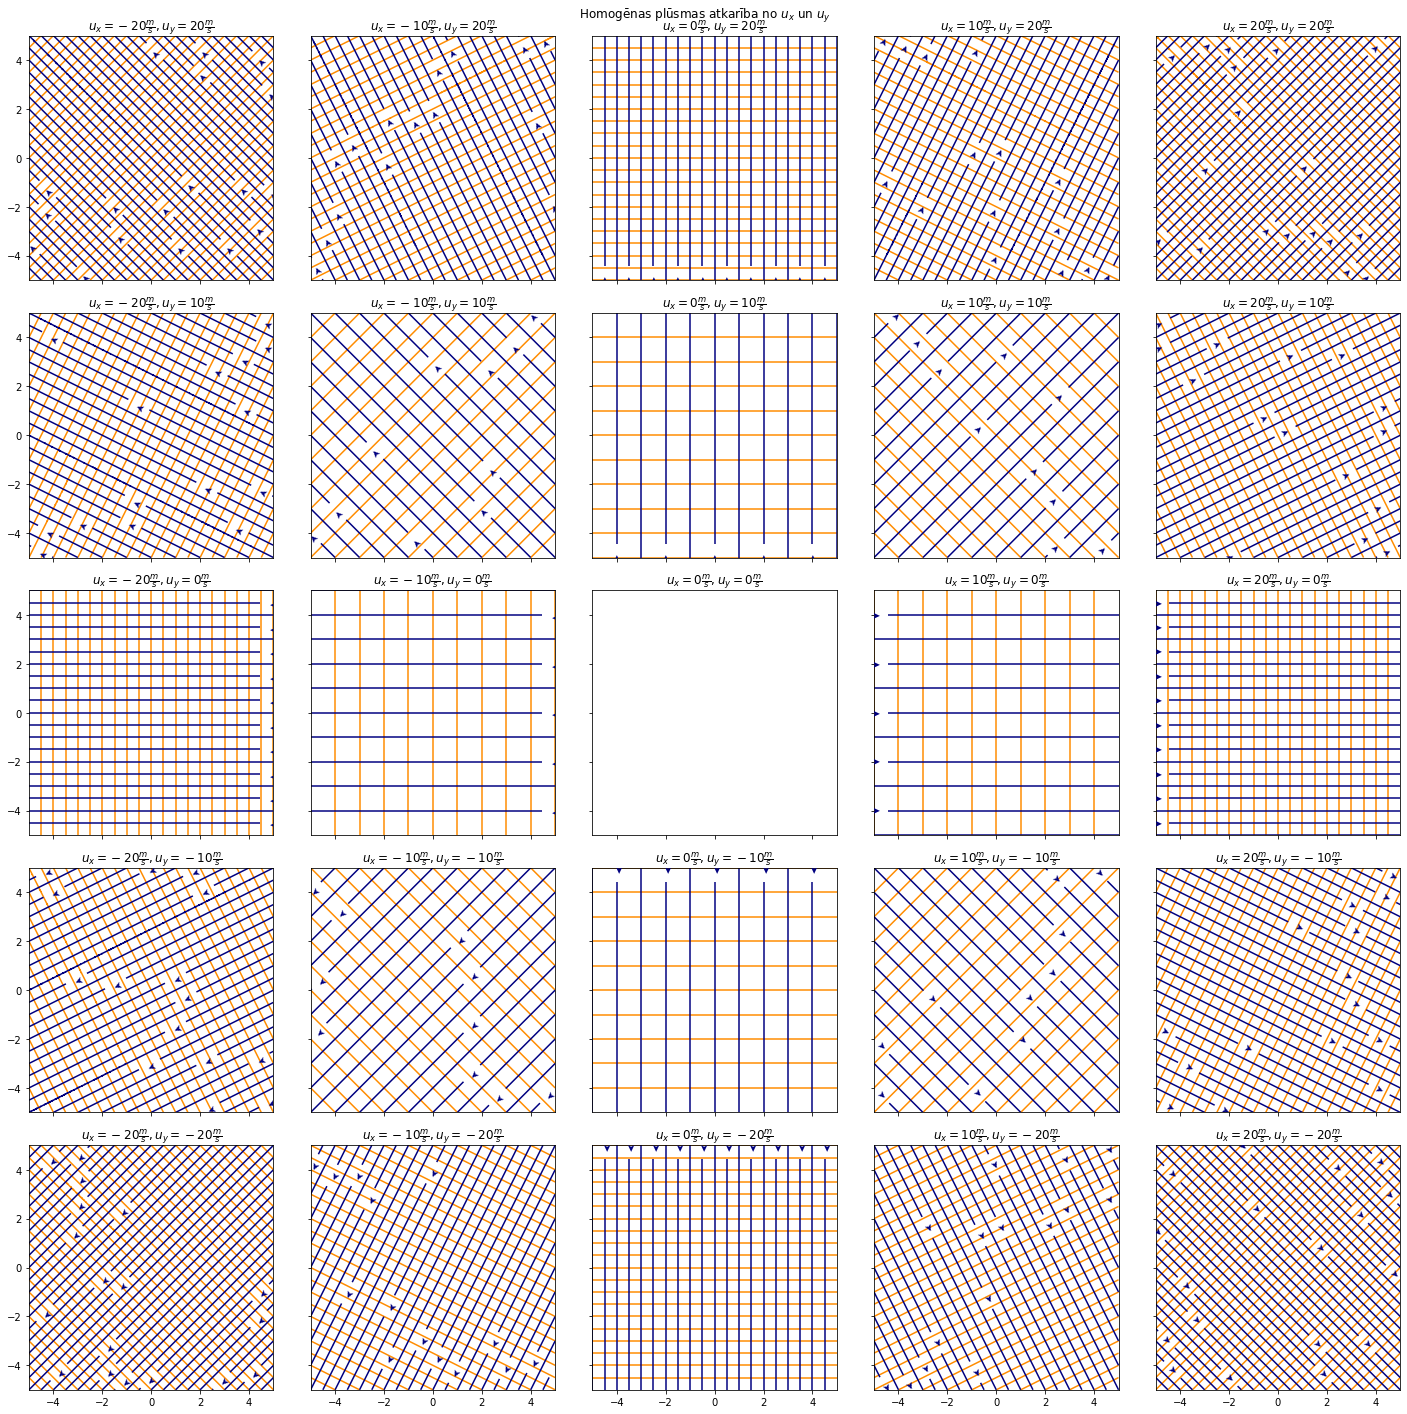

In [2]:
def homogeneous_flow(x, y, u_x, u_y):
    return u_x * y - u_y * x


def homogeneous_flow_potential(x, y, u_x, u_y):
    return u_x * x + u_y * y


U_X = [i for i in range(-20, 30, 10)]
U_Y = [i for i in range(-20, 30, 10)]

fig, axis = plt.subplots(len(U_X), len(U_Y), sharex=True, sharey=True, figsize=(20, 20))
axis = np.reshape(axis, (-1, len(U_Y)))
for u_y, axi in zip(U_Y[::-1], axis):
    for u_x, ax in zip(U_X, axi):
        psi_homogeneous = homogeneous_flow(x, y, u_x, u_y)
        if DRAW_POTENTIALS:
            homogeneous_potential = homogeneous_flow_potential(x, y, u_x, u_y)
            ax.contour(x, y, homogeneous_potential, colors="darkorange", linestyles="solid",
                       locator=ticker.MultipleLocator(10))
        pseudo_stream_plot(ax, x, y, psi_homogeneous, 10, 2)
        ax.set_title(rf"$u_x = {u_x} \frac{{m}}{{s}}, u_y = {u_y} \frac{{m}}{{s}}$")
fig.suptitle("Homogēnas plūsmas atkarība no $u_x$ un $u_y$")
plt.tight_layout()
plt.show()

Šajā grafikā attēloto homogēno plūsmu $u_y$ komponente samazinās virzienā uz leju, bet $u_x$ komponente pieaug virzienā pa labi. Ir redzams, ka šo ātrumu komponenšu attiecība nosaka strāvas līniju virzienu, bet absolūto vērtību summa - strāvas līniju blīvumu. Ja abas ātruma komponentes ir nulle, tad plūsma nav novērojama, kas ir loģiski.

# Punktveida avots/notece

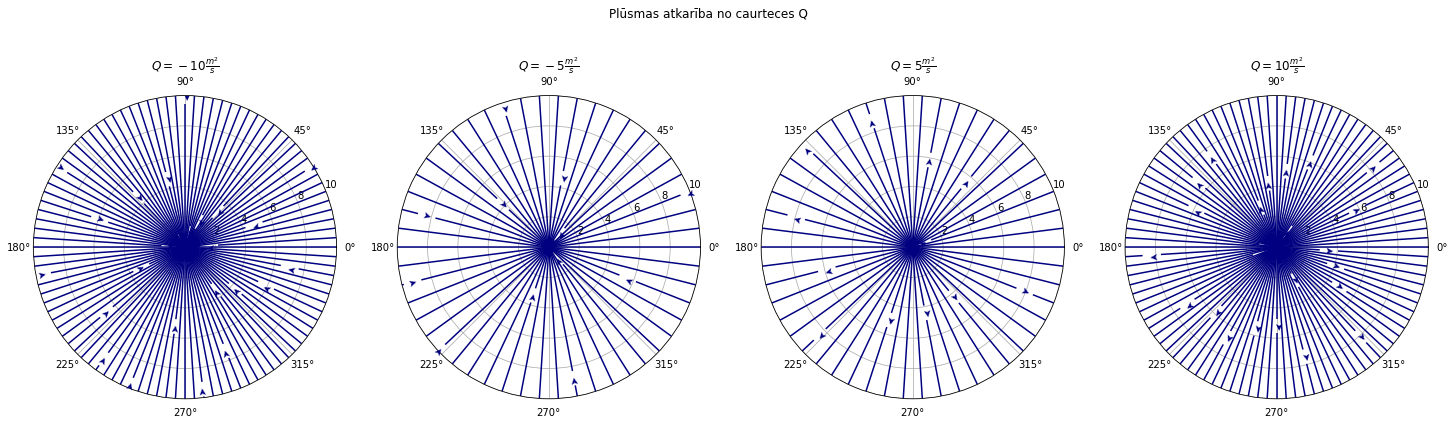

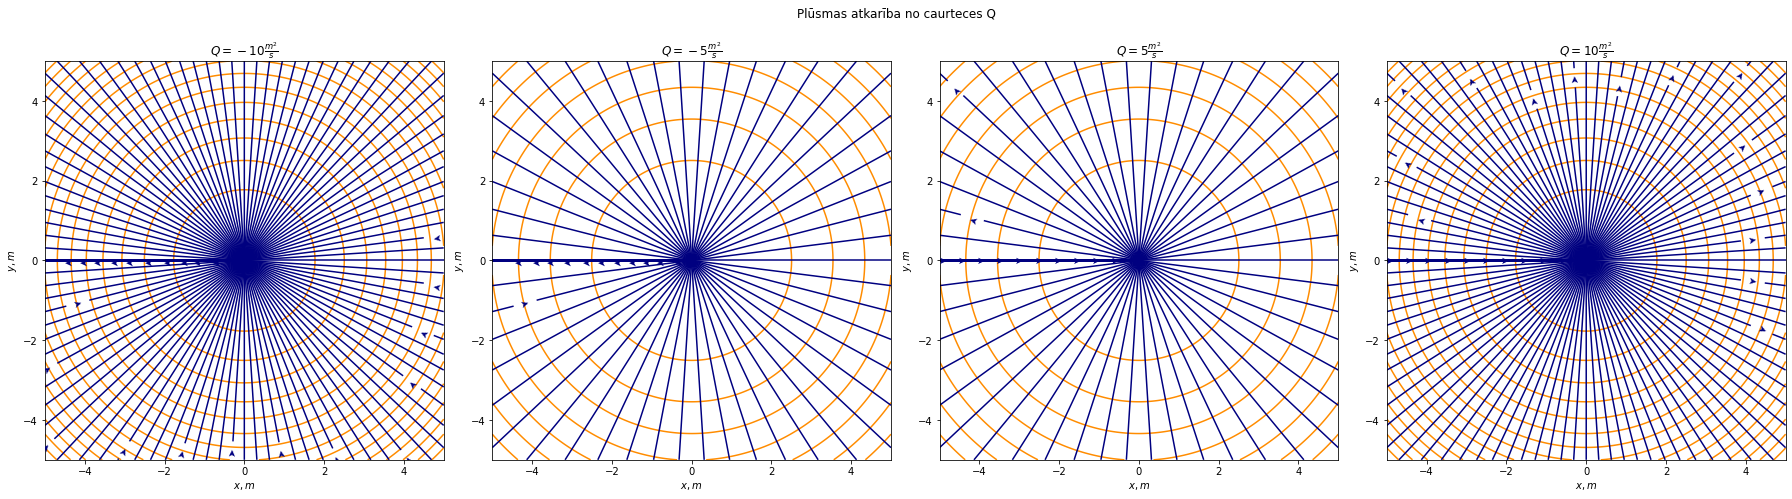

In [3]:
def point_source_polar(r, phi, q):
    return (q * phi) / (2 * np.pi)


def point_source(x, y, q):
    return (q * np.arctan2(y, x)) / (2 * np.pi)


def point_source_potential(x, y, q):
    return (x ** 2 + y ** 2)*q/(2*np.pi)


Q = [-10, -5, 5, 10]
R = np.linspace(0, 10, 500)
PHI = np.radians(np.linspace(0, 360, 20))
r, phi = np.meshgrid(R, PHI)

polar = True
if polar:
    fig_polar, axis_polar = plt.subplots(1, len(Q), figsize=(len(Q) * 5 + 5, 7), subplot_kw=dict(projection="polar"))
fig, axis = plt.subplots(1, len(Q), figsize=(len(Q) * 5 + 5, 7))

for idx, q, in enumerate(Q):
    if DRAW_POTENTIALS:
        point_potential = point_source_potential(x, y, q)
        axis[idx].contour(x, y, point_potential, colors="darkorange", linestyles="solid",
                          locator=ticker.MultipleLocator(5))
    psi_point_source = point_source(x, y, q)
    pseudo_stream_plot(axis[idx], x, y, psi_point_source, 0.1, 4)
    axis[idx].set_xlabel("$x, m$")
    axis[idx].set_ylabel("$y, m$")
    axis[idx].set_title(rf"$Q = {q} \frac{{m^2}}{{s}} $")
    axis[idx].set_xlabel("$x, m$")
    axis[idx].set_ylabel("$y, m$")
    if polar:
        psi_point_source = point_source_polar(r, phi, q)
        pseudo_stream_plot(axis_polar[idx], phi, r, psi_point_source, 0.1, 4)
        axis_polar[idx].set_title(rf"$Q = {q} \frac{{m^2}}{{s}} $")
fig_polar.suptitle("Plūsmas atkarība no caurteces Q")
fig.suptitle("Plūsmas atkarība no caurteces Q")
plt.tight_layout()
plt.show()

Ir redzams, ka gadījumos, kad caurtece ir negatīva, plūsmas līnijas ieiet punktveida notecē, bet gadījumos, kad caurtece ir pozitīva, plūsmas līnijas iziet no avota. Jo lielāka ir caurtece pēc absolūtās vērtības, jo vairāk no noteces / avota attiecīgi ieiet vai iziet plūsmas līnijas. Ir redzams, ka uz $x$ ass negatīvā virziena plūsmas līnija ir treknāka un virziens uz tās ir nepareizā virzienā. Tas ir saistīts ar to, kā `pyplot.contour` attēlo $\arctan()$ radīto pārrāvumu. Attēlojot šīs pašas līnijas polārajās koordinātās, kur $\arctan()$ nav nepieciešams, šī treknākā līnija nav novērojama

# Brīvais virpulis

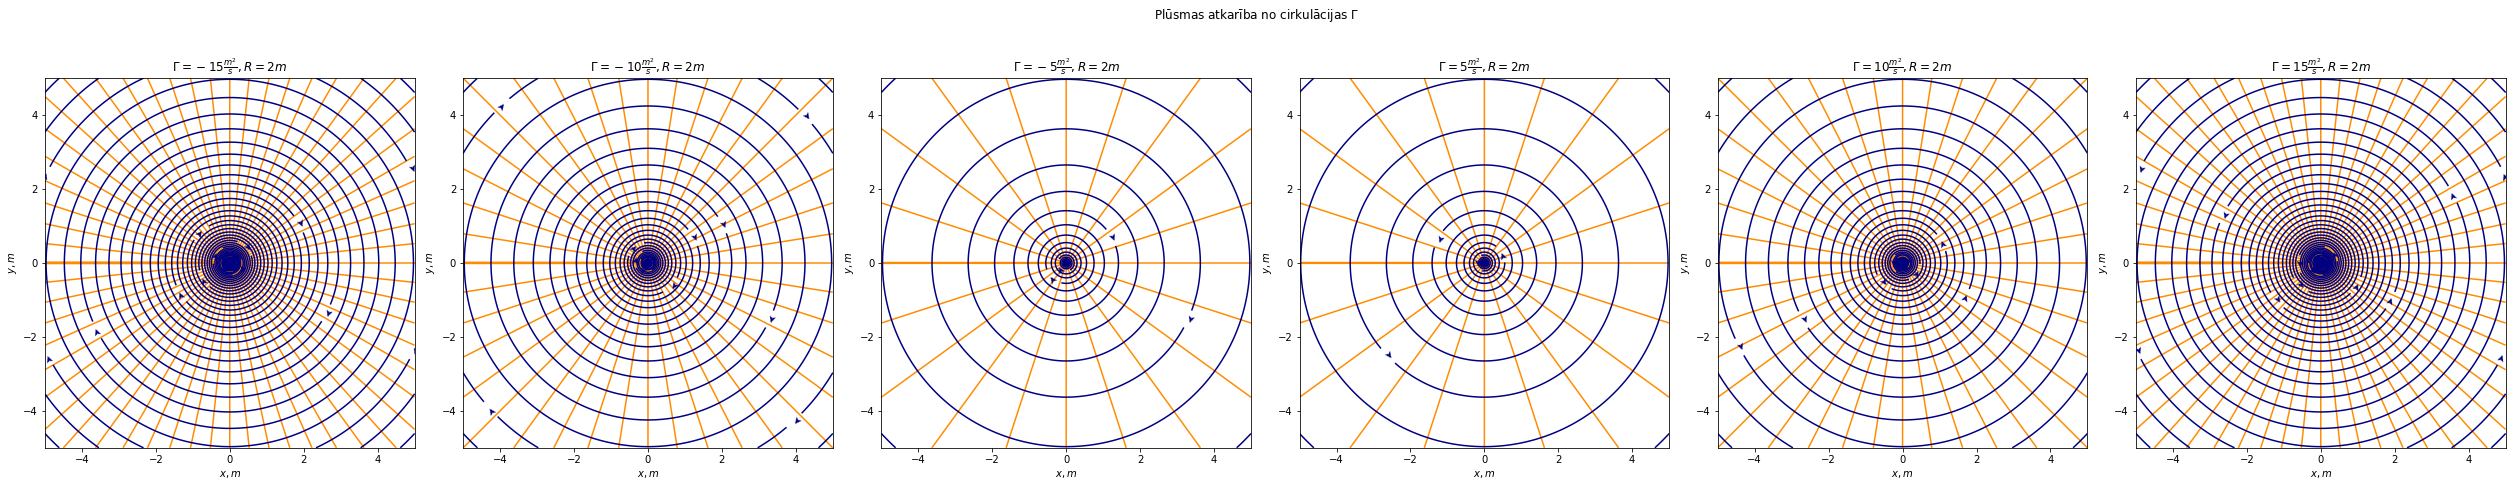

In [4]:
def irrotational_vortex(x, y, gamma, R):
    return -gamma / (2 * np.pi) * np.log((x ** 2 + y ** 2) / R)


def irrotational_vortex_potential(x, y, gamma):
    return (gamma / (2 * np.pi)) * np.arctan2(y, x)


GAMMA = [-15, -10, -5, 5, 10, 15]
R = 2
fig, axis = plt.subplots(1, len(GAMMA), figsize=(len(GAMMA) * 5 + 5, 7))
for gamma, ax in zip(GAMMA, axis):
    irrotational_vortex_psi = irrotational_vortex(x, y, gamma, R)
    if DRAW_POTENTIALS:
        irrotational_potential = irrotational_vortex_potential(x, y, gamma)
        ax.contour(x, y, irrotational_potential, colors="darkorange", linestyles="solid",
                   locator=ticker.MultipleLocator(0.25))
    pseudo_stream_plot(ax, x, y, irrotational_vortex_psi, 0.5, 3)
    ax.set_title(rf"$\Gamma = {gamma} \frac{{m^2}}{{s}}, R = {R} m$")
    ax.set_xlabel("$x, m$")
    ax.set_ylabel("$y, m$")
fig.suptitle(r"Plūsmas atkarība no cirkulācijas $\Gamma$")
plt.tight_layout()
plt.show()

Ja cirkulācija $\Gamma$ ir negatīva, plūsma rotē pa pulksteņrādītāju virzienu, ja pozitīva - pretēji. Jo lielāka cirkulācijas absolūtā vērtība, jo vairāk ir plūsmas līniju.

# Dipola plūsma

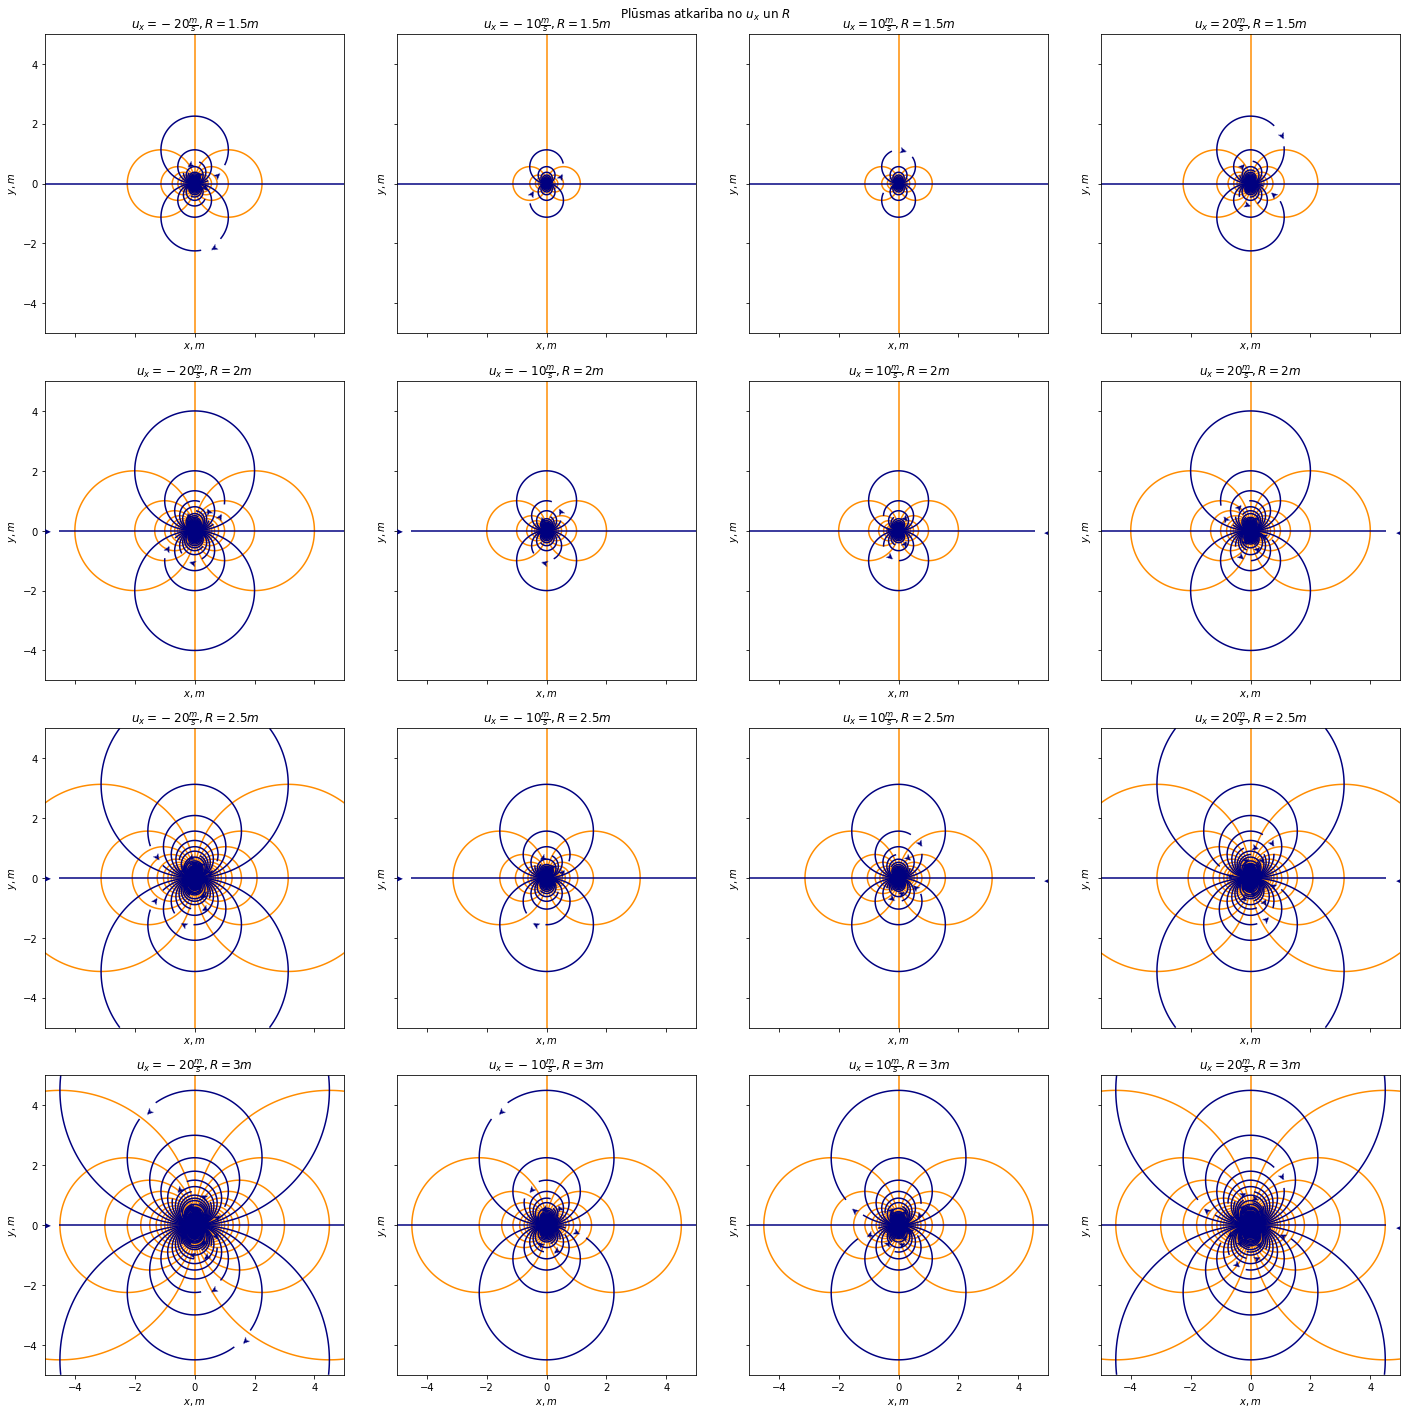

In [5]:
def dipole(x, y, u_x, R):
    return -u_x * R ** 2 * (y / (x ** 2 + y ** 2))


def dipole_potential(x, y, u_x, R):
    return u_x * R ** 2 * (x / (x ** 2 + y ** 2))


U_X = [-20, -10, 10, 20]
R = [1.5, 2, 2.5, 3]

fig, axis = plt.subplots(len(U_X), len(R), sharex=True, sharey=True, figsize=(20, 20))
axis = np.reshape(axis, (-1, len(R)))
for r, axi in zip(R, axis):
    for u_x, ax in zip(U_X, axi):
        psi_dipole = dipole(x, y, u_x, r)
        if DRAW_POTENTIALS:
            dipole_pot = dipole_potential(x, y, u_x, r)
            ax.contour(x, y, dipole_pot, colors="darkorange", linestyles="solid",
                       locator=ticker.MultipleLocator(20))
        pseudo_stream_plot(ax, x, y, psi_dipole, 20, 2)

        ax.set_title(rf"$u_x = {u_x} \frac{{m}}{{s}}, R = {r} m$")
        ax.set_xlabel("$x, m$")
        ax.set_ylabel("$y, m$")
fig.suptitle(r"Plūsmas atkarība no $u_x$ un $R$")
plt.tight_layout()
plt.show()

Dipola plūsmu ietekmē divi parametri - plūsmas ātrums $u_x$ un raksturīgais rādiuss $R$. Palielinot gan plūsmas ātruma absolūto vērtību, gan rādiusu, ir novērojamas vairāk plūsmas līnijas. Plūsmas ātrums nosaka dipolu plūsmas virzienu - ja tas ir negatīvs, tad centrā tā būs pa labi, ja pozitīvs - centrā plūsma būs pa kreisi.

# Cilindra aptecēšana

In [6]:
def cylinder_flow(x, y, u_x, u_y, r):
    return homogeneous_flow(x, y, u_x, u_y) + dipole(x, y, u_x, r)


def cylinder_flow_potential(x, y, u_x, u_y, R):
    return homogeneous_flow_potential(x, y, u_x, u_y) + dipole_potential(x,y,u_x,R)


## Mainot cilindra rādiusu

Locator attempting to generate 3195 ticks ([-7985.0, ..., 7985.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3195 ticks ([-7985.0, ..., 7985.0]), which exceeds Locator.MAXTICKS (1000).


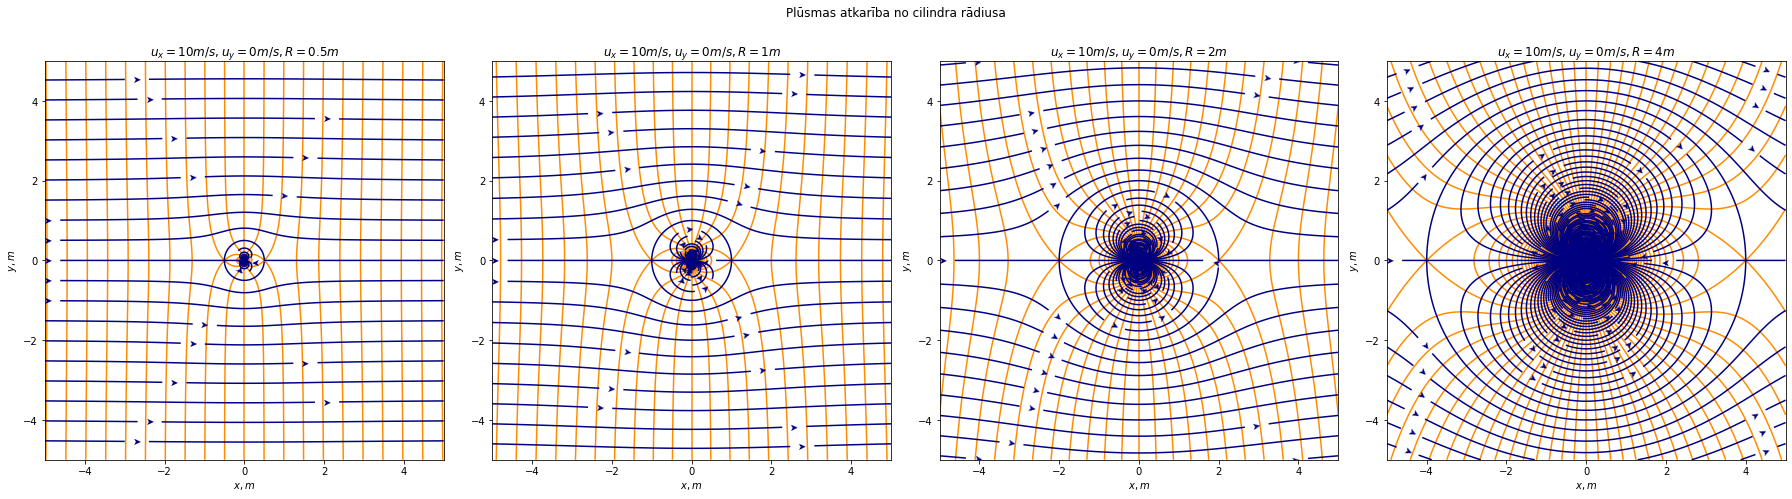

In [7]:
u_x = 10
u_y = 0
R = [0.5, 1, 2, 4]
fig, axis = plt.subplots(1, len(R), figsize=(len(R) * 5 + 5, 7))
for r, ax in zip(R, axis):
    if DRAW_POTENTIALS:
        cylinder_pot = cylinder_flow_potential(x,y, u_x, u_y, r)
        ax.contour(x, y, cylinder_pot, colors="darkorange", linestyles="solid",
                   locator=ticker.MultipleLocator(5))
    cylinder = cylinder_flow(x, y, u_x, u_y, r)
    pseudo_stream_plot(ax, x, y, cylinder, 5, 1)
    ax.set_title(rf"$u_x = {u_x} m/s, u_y = {u_y} m/s, R = {r} m$")
    ax.set_xlabel("$x, m$")
    ax.set_ylabel("$y, m$")
fig.suptitle("Plūsmas atkarība no cilindra rādiusa")
plt.tight_layout()
plt.show()

Palielinot rādiusu, ir redzams, ka cilindra izmēri palielinās un ir vienādi ar rādiusu. Pie lielākiem rādiusiem plūsma tiek vairāk apliekta ap cilindru.

## Mainot $u_x$ ātruma komponenti

Locator attempting to generate 1599 ticks ([-3995.0, ..., 3995.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1599 ticks ([-3995.0, ..., 3995.0]), which exceeds Locator.MAXTICKS (1000).


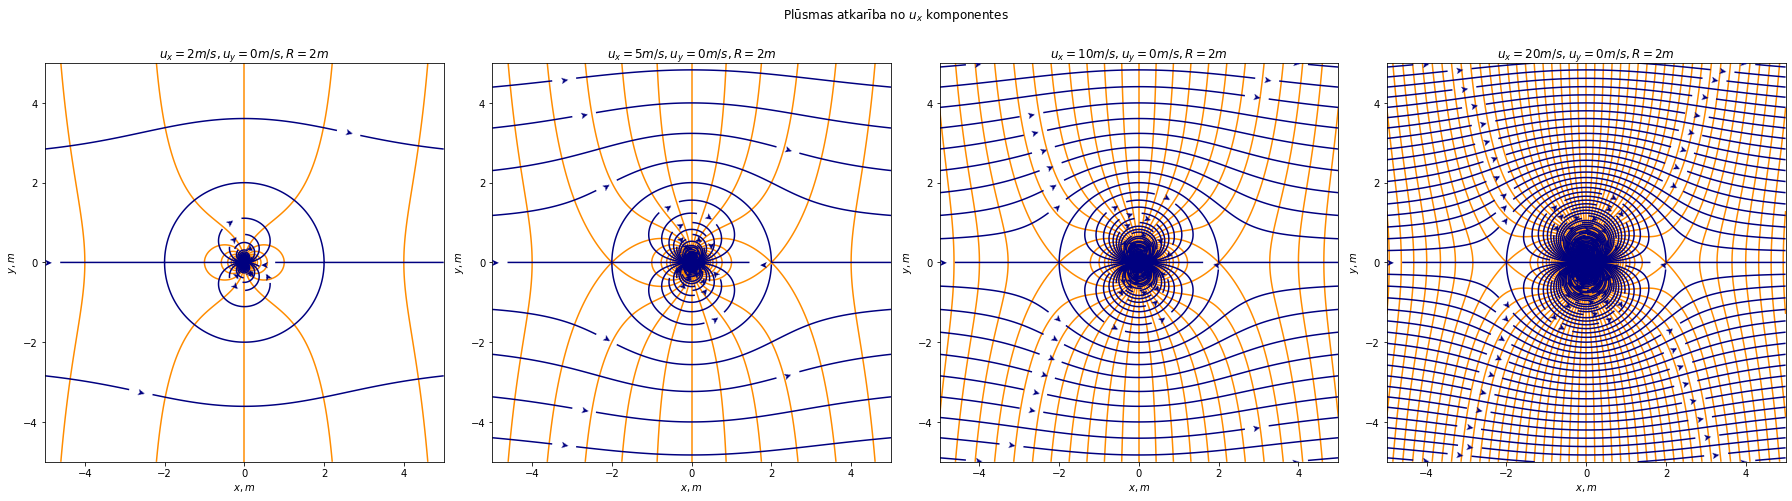

In [8]:
U_X = [2, 5, 10, 20]
u_y = 0
r = 2
fig, axis = plt.subplots(1, len(R), figsize=(len(R) * 5 + 5, 7))
for u_x, ax in zip(U_X, axis):
    if DRAW_POTENTIALS:
        cylinder_pot = cylinder_flow_potential(x,y, u_x, u_y, r)
        ax.contour(x, y, cylinder_pot, colors="darkorange", linestyles="solid",
                   locator=ticker.MultipleLocator(5))
    cylinder = cylinder_flow(x, y, u_x, u_y, r)
    pseudo_stream_plot(ax, x, y, cylinder, 5, 1)
    ax.set_title(rf"$u_x = {u_x} m/s, u_y = {u_y} m/s, R = {r} m$")
    ax.set_xlabel("$x, m$")
    ax.set_ylabel("$y, m$")
fig.suptitle("Plūsmas atkarība no $u_x$ komponentes")
plt.tight_layout()
plt.show()

Palielinot $u_x$ ātruma komponenti, var skaidrāk saskatīt plūsmu ap cilindru (ir vairāk plūsmas līnijas, jo ātrums ir lielāks). Taču kopumā citas īpašības neizmainās.

# Rotējoša cilindra aptecēšana

In [9]:
def rotating_cylinder_flow(x, y, u_x, u_y, r, gamma):
    return cylinder_flow(x, y, u_x, u_y, r) + irrotational_vortex(x, y, gamma, r)


def rotating_cylinder_potential(x, y, u_x, u_y, R, gamma):
    return cylinder_flow_potential(x, y, u_x, u_y, R) + irrotational_vortex_potential(x, y, gamma)


## Mainot cirkulāciju

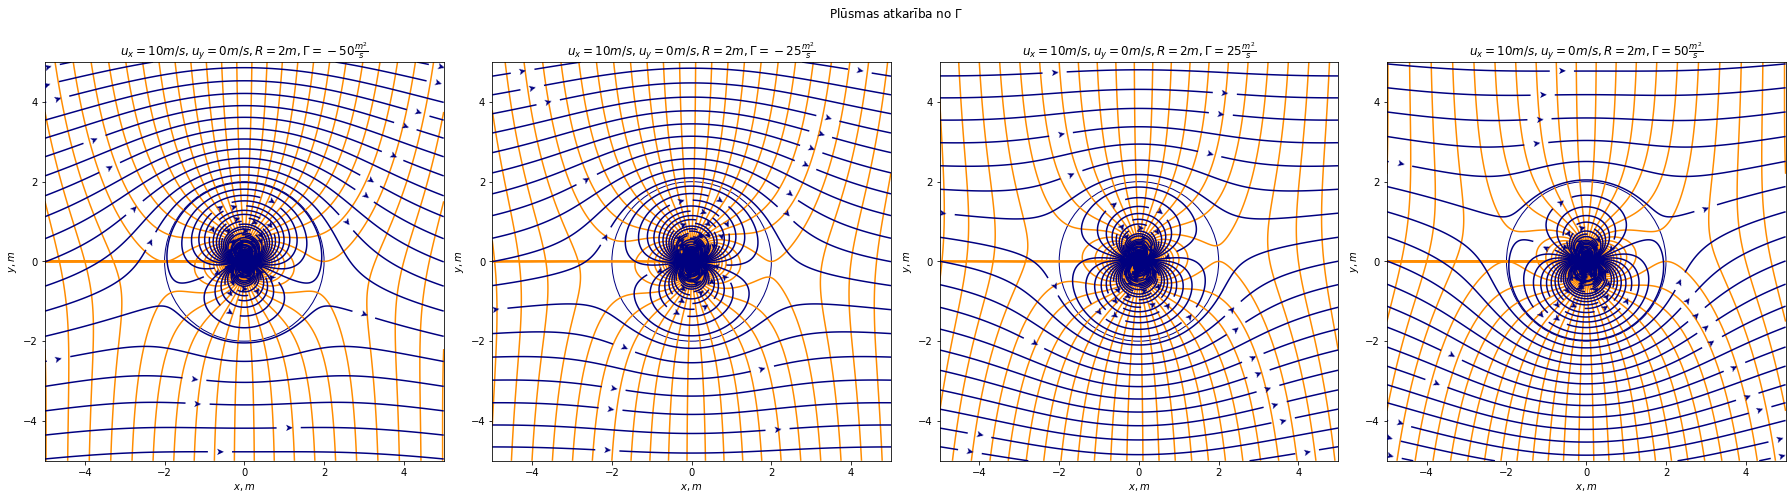

In [10]:
gamma = [-50, -25, 25, 50]
u_x = 10
u_y = 0
r = 2
fig, axis = plt.subplots(1, len(gamma), figsize=(len(gamma) * 5 + 5, 7))
for g, ax in zip(gamma, axis):
    rotating_cylinder = rotating_cylinder_flow(x, y, u_x, u_y, r, g)
    if DRAW_POTENTIALS:
        rotating_cylinder_pot = rotating_cylinder_potential(x, y, u_x, u_y, r, g)
        ax.contour(x, y, rotating_cylinder_pot, colors="darkorange", linestyles="solid",
                   locator=ticker.MultipleLocator(5))
    pseudo_stream_plot(ax, x, y, rotating_cylinder, 5, 1)
    circle = plt.Circle((0,0), r, color="navy", fill=False)
    ax.add_patch(circle)
    ax.set_title(rf"$u_x = {u_x} m/s, u_y = {u_y} m/s, R = {r} m, \Gamma = {g} \frac{{m^2}}{{s}}$")
    ax.set_xlabel("$x, m$")
    ax.set_ylabel("$y, m$")
fig.suptitle("Plūsmas atkarība no $\Gamma$")
plt.tight_layout()
plt.show()

Ja cilindrs tiek rotēts, ir redzams ka plūsma apiet cilindru nesimetriski. Šī nesimetrija rada uz cilindru spēku (Magnusa efekts). Cirkulācijas absolūtā vērtība nosaka, cik intensīvs ir Magnusa efekts. Ja cirkulācija ir negatīva, cilindrs rotē pulksteņrādītāju virzienā un spēks iedarbojas no apakšas uz augšu, bet ja cirkulācija ir pozitīva - cilindrs rotē pretēji pulksteņrādītāju virzienam un spēks iedarbojas no augšas uz leju.

# Strāvas funkcijas īpašības
## Punktveida avota ātruma vektors
$$ \nabla \times { \mathbf{\psi} \mathbf{e_z}} = \frac{1}{r} \frac{\partial \psi}{\partial \varphi} \mathbf{r}- \frac{\partial \psi}{\partial r} \mathbf{\varphi} = \frac{1}{r} \frac{\partial (\frac{Q\varphi}{2\pi})}{\partial \varphi} \mathbf{r}- \frac{\partial (\frac{Q\varphi}{2\pi})}{\partial r} \mathbf{\varphi} = \frac{1}{r} \frac{Q}{2\pi} \mathbf{r} -0=u_r \mathbf{r} = \mathbf{u} $$

## Punktveida avota strāvas funkcija apmierina Laplasa vienādojumu

$$\Delta \psi = \Delta \frac{Q\varphi}{2\pi} =  {1 \over r }{\partial \over \partial r }\left(r {\partial (\frac{Q\varphi}{2\pi}) \over \partial r }\right)+{1 \over r ^{2}}{\partial ^{2}\frac{Q\varphi}{2\pi} \over \partial \varphi ^{2}}= 0 + {1 \over r ^{2}}{\partial \frac{Q}{2\pi} \over \partial \varphi} = 0$$

# Uzrakstiet, kas, jūsuprāt, ir strāvas funkcija? Ko tā attēlo? Kādēļ un vai to ir jēga ieviest?

Ja šķidruma plūsmā izvēlas divus punktus un savieno tos ar līniju, tad strāvas funkcija ir caur šo līniju izejošā plūsma. Šai funkcijai ir virkne noderīgu īpašību, piemēram, plūsmas ātruma komponentes var izteikt ar strāvas funkcijas parciālajiem atvasinājumiem. Vēl var ieviest strāvas līnijas jēdzienu - līnijas, uz kurām strāvas funkcija ir konstanta. Ātruma vektors ir pieskare strāvas līnijām, bet strāvas līniju blīvums norāda uz ātruma absolūto vērtību. Vēl viena strāvas funkcijas īpašība ir tāda, ka tās var saskaitīt (superpozīcijas princips) - tādējādi sarežģītāku plūsmu (piemēram, ap rotējošu cilindru) var modelēt, saskaitot vienkāršākas plūsmas. Tieši šo īpašību dēļ ir jēga ieviest strāvas funkcijas jēdzienu.

# Uzrakstiet, kas, jūsuprāt, ir potenciāla šķidruma plūsma? Vai un ar ko tā atšķiras, ir līdzīga citām plūsmām? Vai un kas ir jāņem vērā, to pielietojot?

Potenciāla plūsma ir tad, ja šīs plūsmas ātruma vektoru lauku var izteikt ar kādas citas skalāras funkcijas gradientu. Šis ir reālas plūsmas vienkāršojums / modelis, jo potenciāla plūsma nedrīkst būt virpuļaina, tātad daži plūsmu veidi nevar tikt raksturoti ar potenciālas plūsmas modeli, piemēram, ja plūsmā ir bīdes spriegumi (piemēram, Puazeja plūsma), vai ja virpuļainība ir kādu citu iemeslu dēļ. Taču gadījumos, kad var pieņemt, ka plūsma ir nevirpuļaina, potenciālas plūsmas plūsma ir ļoti noderīga, jo tas ievērojami vienkāršo plūsmas vienādojumus. Potenciālo plūsmu bieži izmanto lidmašīnu būvē modelējot spārnus. Pielietojot potenciālu plūsmu, jāņem vērā, ka tā neraksturo visas plūsmas īpašības (jo nav virpuļainība), līdz ar to var rasties nepareizi secinājumi, piemēram d’Alembēra paradokss. Tāpēc var nākties apvienot potenciālu plūsmu ar citiem modeļiem / teorijām, piemēram robežslāņu teoriju.